In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sn
import folium
import math
import json
from branca.colormap import LinearColormap
from branca.element import MacroElement
from jinja2 import Template
import matplotlib.pyplot as plt

In [2]:
mentions = pd.read_csv('../Data_sinan/intercountry_tone_count_table_with_EVENTCODE',\
                              dtype={'EventRootCode': np.str, 'EventCode': np.str} \
                             )

protests_df = pd.read_csv('../Data_sinan/Protests.csv')

country_info_df = pd.read_csv('../Data_sinan/countryinfo.csv')
world_borders = json.load(open('../Data/world_borders.topojson.json'))
fips_codes = pd.read_csv('../Data/fipscountries.csv')
fips_codes = fips_codes[['fips','country']]
happiness_df = pd.read_excel('../Data_sinan/WHR2018Chapter2OnlineData.xls')
happiness_df = happiness_df[happiness_df['year']==2015][['country','Confidence in national government', 'Democratic Quality']]


In [3]:
mentions.head()

,EventRootCode,EventCode,LocMention,LocEvent,AverageTone,NumberOfInterMentions
0,02,021,BH,GY,-2.748098,2
1,13,131,FI,CA,-0.865801,1
2,08,085,NE,SW,-0.535016,11
3,18,183,SM,SY,-4.294479,1
4,17,170,LH,BO,-3.949045,1


In [4]:
population = country_info_df[['fips', 'population']]

In [5]:
#mentions = mentions[pd.notnull(protests_df['LocEvent'])]
#mentions = (mentions[(mentions["EventRootCode"]!='--') & (mentions["EventCode"]!='--')])


In [6]:
mentions = fips_codes.merge(mentions, left_on='fips', right_on='LocEvent', how='inner')
#intercountry_df.loc[intercountry_df['country']=='United States', 'country'] = 'United States of America'
#intercountry_df.loc[intercountry_df['country']=='Serbia', 'country'] = 'Republic of Serbia'

In [7]:
mentions = mentions[['country', 'EventRootCode', 'EventCode', 'NumberOfInterMentions', 'fips']]
mentions_protests = mentions[mentions['EventRootCode'] == '14']
mentions_protests = mentions_protests.groupby(['country', 'fips'], as_index=False).NumberOfInterMentions.sum()
mentions_protests.rename(index=str, columns={"NumberOfInterMentions": "Mention of protests"}, inplace=True)


In [8]:
mentions_protests.head()

,country,fips,Mention of protests
0,Afghanistan,AF,55915
1,Albania,AL,61551
2,Algeria,AG,14912
3,American Samoa,AQ,92
4,Andorra,AN,400


In [9]:
protests_df.rename(index=str, columns={"f0_": "Number of protests", 'LocEvent':'fips'}, inplace=True)
protests_df.head()

,Number of protests,fips
0,256,AN
1,31232,SA
2,1,SB
3,1,DQ
4,1,LQ


In [10]:
merged = mentions_protests.merge(protests_df, on='fips')

In [11]:
merged.sort_values(by='Number of protests', ascending =False).head()

,country,fips,Mention of protests,Number of protests
223,United States,US,2585806,722163
93,India,IN,406259,219592
99,Israel,IS,716373,152028
173,Russia,RS,327680,131837
222,United Kingdom,UK,308376,123079


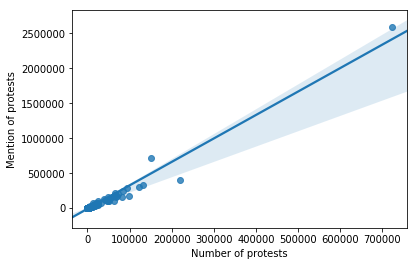

In [12]:
sn.regplot(x='Number of protests', y='Mention of protests', data=merged)


In [13]:
merged = merged[merged['Number of protests'] < 700000]

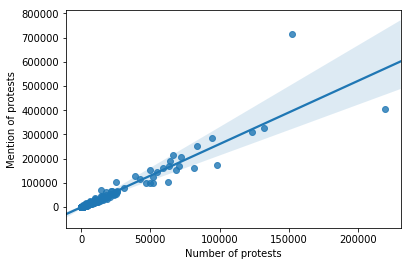

In [14]:
sn.regplot(x='Number of protests', y='Mention of protests', data=merged)